### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Obtain the Location
* For example the engineering building of Bilbao: BIZ-Bilbao > Ingenieros > Planta 1 & BIZ-Bilbao > Ingenieros > Planta 2 & BIZ-Bilbao > Ingenieros > Planta 3
BIZ-Bilbao > Ingenieros > Planta 4 & BIZ-Bilbao > Ingenieros > Planta Baja & BIZ-Bilbao > Ingenieros > Sotano 1 & BIZ-Bilbao > Ingenieros > Planta Sotano 2

In [2]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_DATOS
df1_location = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_DATOS.csv")

# Make a copy
df_location = df1_location.copy()

# Extract from CSV file the 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2' to obtain 'ap_name'
# 1st drop unnnecesary data
df_location.drop(labels=["id","ip_address","ip_type","type","vendor","avg_session_throughput","troughput", "interface",
"ap_mac_address","ap_ip_address","ssid","vlan","protocol","status","on_network","association_time","session_length",
"first_seen","traffic","encryption_cipher","rssi","snr","802_11u_client"], axis=1, inplace=True)

# 2nd stay only with data that 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2'
df_location = df_location[(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 1')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 2')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 3')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 4')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta Baja')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Sotano 1')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Sotano 2')|
(df_location["location"] == 'BIZ-Leioa > Magisterio > P0') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P1') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P2') |
(df_location["location"] == 'BIZ-Leioa > Magisterio > P3')]

# Show dataframe
df_location

,location,ap_name
2,BIZ-Bilbao > Ingenieros > Planta 2,AP-ETSIIyT-1602E-U022766
7,BIZ-Bilbao > Ingenieros > Planta 3,AP-ETSIIyT-1702-U022650
9,BIZ-Leioa > Magisterio > P3,AP-EGB-Leioa-1142-U016992
16,BIZ-Bilbao > Ingenieros > Planta 3,AP-ETSIIyT-1702-U022388
22,BIZ-Leioa > Magisterio > P0,AP-EGB-Leioa-1142-U010867
...,...,...
69783,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-2802-U034564
69787,BIZ-Leioa > Magisterio > P1,AP-EGB-Leioa-2802-U032095
69788,BIZ-Leioa > Magisterio > P2,AP-EGB-Leioa-2802-U037630
69790,BIZ-Bilbao > Ingenieros > Planta 2,AP-ETSIIyT-1602E-U022767


### Obtain with the 'ap_name' the 'suma_troghput' & 'cuenta_de_ip_address' 

In [3]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv
df1_ap = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv")

# Make a copy
df_ap = df1_ap.copy()

# Extract from CSV file the 'etiquetas_de_fila' of the df_location['ap_name']
# 1st save data of df_location['ap_name']
ap_name = df_location['ap_name']

# 2nd stay only the data of the 'ap_name'
df_ap_filter = df_ap[df_ap["etiquetas_de_fila"].isin(ap_name)]

# Show dataframe filter
df_ap_filter


,etiquetas_de_fila,suma_de_troughput,cuenta_de_ip_address
485,AP-EGB-3702-U034482,"109,8",4.0
521,AP-EGB-Leioa-1142-U010865,"9353,2",33.0
522,AP-EGB-Leioa-1142-U010866,"6481,6",39.0
523,AP-EGB-Leioa-1142-U010867,"60486,5",94.0
524,AP-EGB-Leioa-1142-U010868,"2623,5",14.0
...,...,...,...
758,AP-ETSIIyT-3702-U022252,"6543,8",9.0
759,AP-ETSIIyT-3702-U022253,"1434,2",7.0
760,AP-ETSIIyT-3702-U022254,"1938,1",3.0
761,AP-ETSIIyT-3702-U022648,"13670,1",27.0


### Drop the unnecsary data

In [4]:
df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)

# Convert String to float of df_ap_filter['suma_de_troughput'] column
# Replace ',' of the String to be able to convert to Float
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].astype(float)

# Show info of dataframe
df_ap_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 485 to 762
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   suma_de_troughput     191 non-null    float64
 1   cuenta_de_ip_address  191 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


C:\Users\alvar\AppData\Local\Temp\ipykernel_21796\32999323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_21796\32999323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
C:\Users\alvar\AppData\Local\Temp\ipykernel_21796\32999323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

### Elbow method

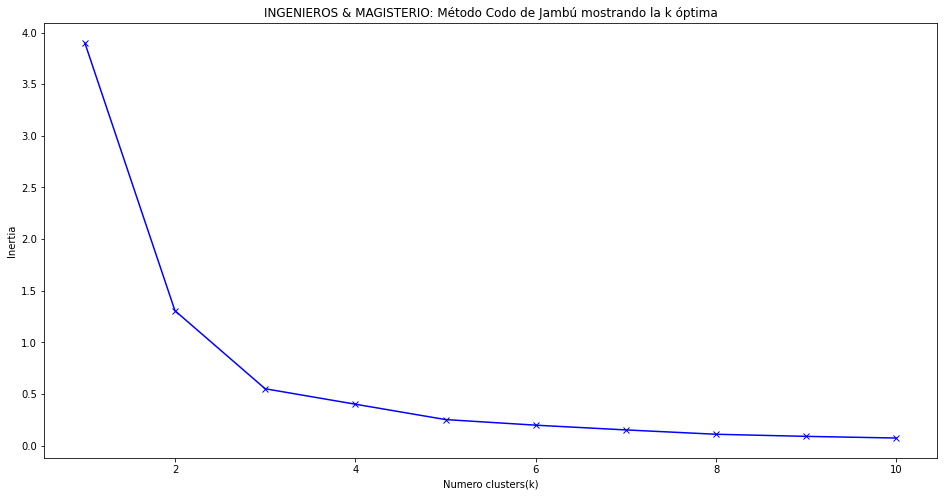

In [5]:
# Normalize data
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
normalize = min_max_scaler.fit_transform(df_ap_filter)
df_normalize = pd.DataFrame(normalize)

# Rename column of data frame normalize
df_normalize = df_normalize.rename(columns={0: 'total_devices', 1: 'bw_busy'}) #I change the name of the columns to be the same as in the data of Dublin

# Elbow method
inertia = [] 
rango = range(1,11)
for i in rango:
    algoritmo = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo.fit(df_normalize)
    inertia.append(algoritmo.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-')
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('INGENIEROS & MAGISTERIO: Método Codo de Jambú mostrando la k óptima')

# Print plt
plt.show()

### k-means from sklearn
* With the Elbow method we obtain the optimal k is 3

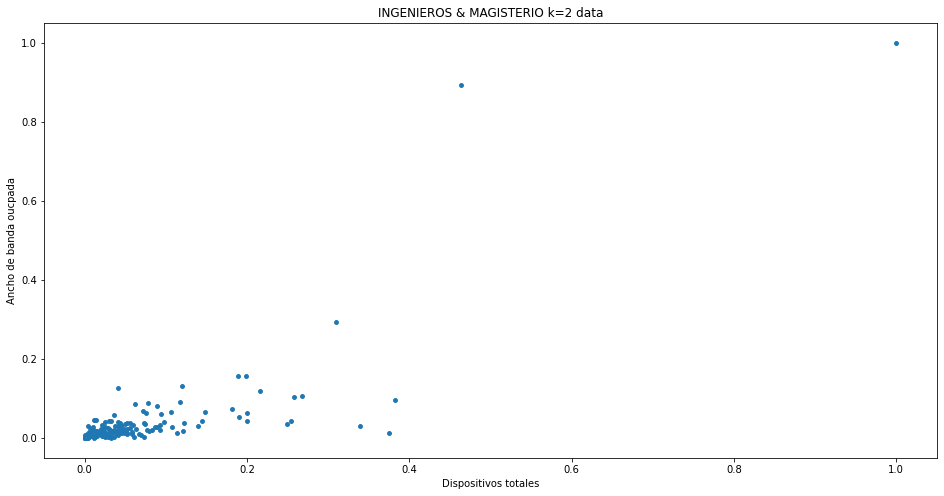

In [6]:
# Show K-means for k=2
# Number of clusters
k = 2

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster_kdos = kmeans.fit_predict(df_normalize)
df_normalize['cluster'] = cluster_kdos

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(16,8))
plt.title("INGENIEROS & MAGISTERIO k=2 data")
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic representation of k-means clusters

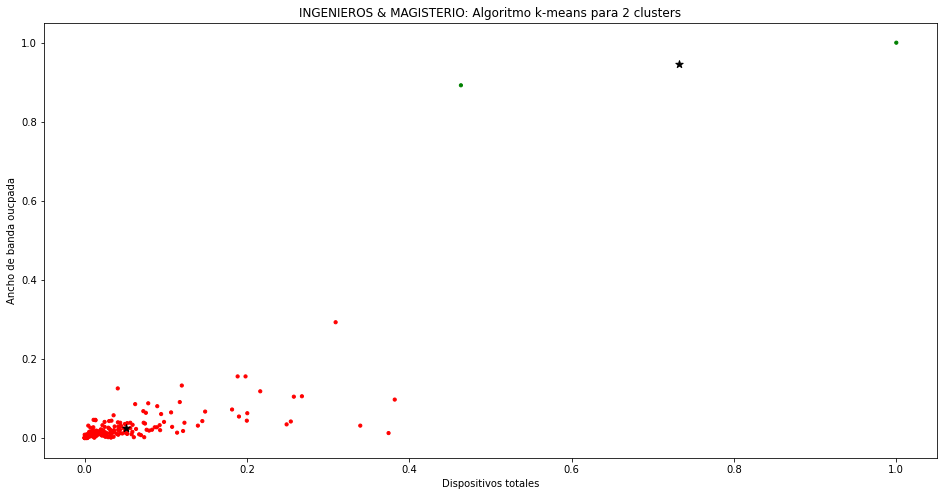

In [7]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster_kdos:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(16,8))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('INGENIEROS & MAGISTERIO: Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

In [8]:
# Show info of cluster
copy_kdos = pd.DataFrame()
copy_kdos['bw_busy']=df_normalize['bw_busy'].values
copy_kdos['total_devices']=df_normalize['total_devices'].values
copy_kdos['cluster'] = df_normalize['cluster'].values
cantidadGrupo_kdos =  pd.DataFrame()
cantidadGrupo_kdos['cantidad']=copy_kdos.groupby('cluster').size()
cantidadGrupo_kdos

,cantidad
cluster,
0,189
1,2


### k-means now for K = 3

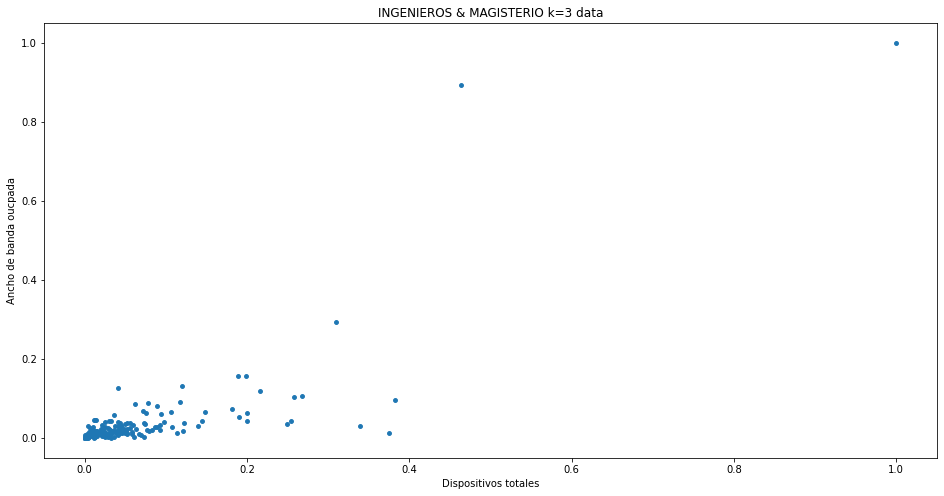

In [9]:
# Number of clusters
k = 3

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster = kmeans.fit_predict(df_normalize)
df_normalize['cluster'] = cluster

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(16, 8))
plt.title("INGENIEROS & MAGISTERIO k=3 data")
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic represnetation of K-means clusters

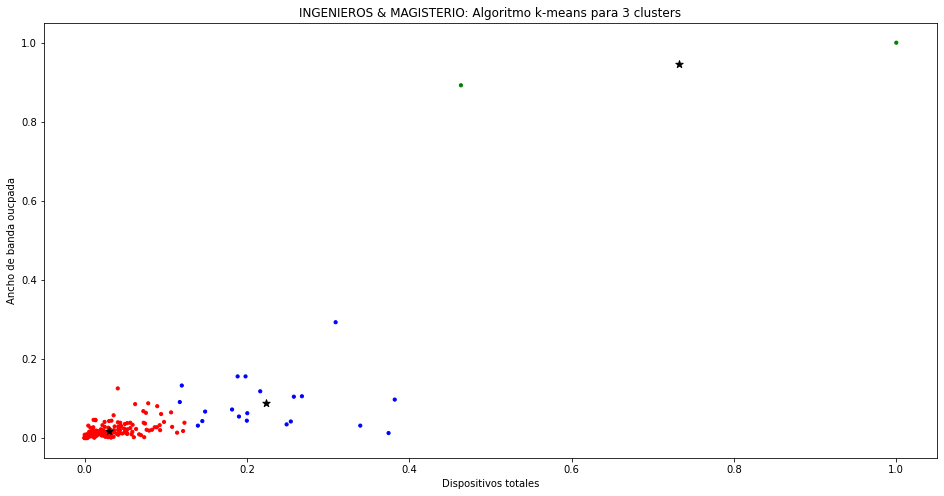

In [10]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(16,8))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('INGENIEROS & MAGISTERIO: Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

In [11]:
# Show info of cluster
copy = pd.DataFrame()
copy['bw_busy']=df_normalize['bw_busy'].values
copy['total_devices']=df_normalize['total_devices'].values
copy['cluster'] = df_normalize['cluster'].values
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('cluster').size()
cantidadGrupo

,cantidad
cluster,
0,169
1,2
2,20
